In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Neural network creation

In [ ]:
# class CopulaModel(nn.Module):
#     def __init__(self, dataPoints):
#         super(CopulaModel, self).__init__()
#         dimensions = dataPoints.size(1)
#         self.fc = nn.Sequential(
#             nn.Linear(dimensions, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 10),
#             nn.Tanh(),
#             nn.Linear(10, 1),
#             nn.Sigmoid()
#         )
        
#         self.upperBoundary = self._generateUpperBoundaryPoints(dimensions)
#         self.lowerBoundary = self._generateLowerBoundPoints(dimensions)
#         self.flagSumData = self._FlagSum(dataPoints, dataPoints)
#         self.delta_m = 1 / dataPoints.shape[0]
        

#     def forward(self, x):
#         return self.fc(x)

#     def Copula_loss_function(self, x): ## MAKE SURE TO PASS IN THE SAME DATAPOINTS AS IN THE INITIALIZATION
#         x.requires_grad = True
#         y_pred = self(x)
#         dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
        
#         if torch.any(torch.isnan(dydx)) or torch.any(torch.isinf(dydx)):
#             print("Invalid values in dydx:", dydx)
        
#         #delta_m = 1 / x.shape[0]
#         # flagSum = self._FlagSum(x, x)

#         L1 = -torch.mean(torch.log(dydx + 1e-8))
#         L2 = torch.mean(torch.relu(-dydx))
#         L3 = torch.abs(1 - torch.mean(dydx * self.delta_m ** 2))
#         L4 = torch.sum(self(self.lowerBoundary)) + torch.sum(torch.abs(self(self.upperBoundary) - torch.min(self.upperBoundary, dim=1).values.view(-1,1)))
#         L5 = 1/(x.shape[0]**2) * torch.sum(torch.abs(y_pred - self.flagSumData))
#         Loss = L1 + L2 + L3 + L4 + L5
#         return Loss
    
#     def _generateLowerBoundPoints(self, d, num_points=100):
#         grid = np.linspace(0, 1, num_points)
#         all_surfaces = []
#         for k in range(d):
#             grid_points = np.meshgrid(*([grid] * (d - 1)), indexing="ij")
#             points = np.stack(grid_points, axis=-1).reshape(-1, d - 1)
#             surface_points = np.insert(points, k, 0, axis=1)
#             all_surfaces.append(surface_points)
#         return torch.tensor(np.vstack(all_surfaces), dtype=torch.float32)

#     def _generateUpperBoundaryPoints(self, d, num_points=100):
#         oneArray = np.ones((d * num_points, d))
#         u = np.linspace(0, 1, num_points)
#         for i in range(d):
#             oneArray[i * num_points:(i + 1) * num_points, i] = u
#         return torch.tensor(oneArray, dtype=torch.float32)

#     def _flag(self, x: torch.Tensor, y: torch.Tensor) -> float:
#         return float(torch.all(y < x))

#     def _FlagSum(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
#         tensor = torch.zeros(x.size(0), dtype=torch.float)
#         for i, x_row in enumerate(x):
#             total = 0
#             for j, y_row in enumerate(y):
#                 total += self._flag(x_row, y_row)
#             tensor[i] = total
#         return tensor

# ## Creating data
# corrMat = np.array([[1, 0.7], [0.7, 1]])
# A = np.linalg.cholesky(corrMat)
# np.random.seed(0)
# Z = np.random.standard_normal((2000, 2))
# X = (A @ Z.T).T

# # U_uncorrelated = norm.cdf(Z)
# U_correlated = norm.cdf(X)

# # U_uncorrelated_tensor = torch.tensor(U_uncorrelated, dtype=torch.float32)
# U_correlated_tensor = torch.tensor(U_correlated, dtype=torch.float32)

# #U_prod_tensor = torch.tensor(np.random.uniform(), dtype=torch.float32)

# # Training setup
# model = CopulaModel(dataPoints=U_correlated_tensor)
# optimizer = optim.Adam(model.parameters(), lr=0.01)

# # Training loop
# epochs = 5000

# for epoch in range(epochs):
#     optimizer.zero_grad()
#     loss = model.Copula_loss_function(U_correlated_tensor)
#     loss.backward()
#     optimizer.step()

#     if epoch % 500 == 0:
#         print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: nan
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: 750.4598388671875
Epoch 3000, Loss: 755.914794921875
Epoch 3500, Loss: 749.5853271484375
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan


After change of points for L5

In [ ]:
#torch.manual_seed(0)

class CopulaModel(nn.Module):
    def __init__(self, dataPoints):
        super(CopulaModel, self).__init__()
        dimensions = dataPoints.size(1)
        self.fc = nn.Sequential(
            nn.Linear(dimensions, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 10),
            nn.Tanh(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )
        
        self.upperBoundary = self._generateUpperBoundaryPoints(dimensions)
        self.lowerBoundary = self._generateLowerBoundPoints(dimensions)


        # Sample data points on the unit square
        u= np.linspace(0.0, 1.0, 15)
        U1, U2 = np.meshgrid(u, u, indexing="ij")
        unitSquarePoints= np.column_stack((U1.ravel(), U2.ravel()))
        self.unitSquaretensor = torch.tensor(unitSquarePoints, dtype=torch.float32)
        self.flagSumData = self._FlagSum(self.unitSquaretensor, self.unitSquaretensor)
        self.delta_m = 1 / dataPoints.shape[0]
        

    def forward(self, x):
        return self.fc(x)

    def Copula_loss_function(self, x): ## MAKE SURE TO PASS IN THE SAME DATAPOINTS AS IN THE INITIALIZATION
        x.requires_grad = True
        self.unitSquaretensor.requires_grad = True
        y_pred = self(x)
        dydx = torch.autograd.grad(y_pred, x, torch.ones_like(y_pred), create_graph=True)[0]
        y_pred_unitSquare = self(self.unitSquaretensor)
        dydx_unitsquare = torch.autograd.grad(y_pred_unitSquare, self.unitSquaretensor, torch.ones_like(y_pred_unitSquare), create_graph=True)[0]
        L5Predictions = self(self.unitSquaretensor)
        
        L1 = -torch.mean(torch.log(torch.relu(dydx) + 1e-8))
        L2 = torch.mean(torch.relu(-dydx_unitsquare))
        L3 = torch.abs(1 - torch.sum(dydx_unitsquare / self.unitSquaretensor.shape[0]))
        L4 = torch.sum(self(self.lowerBoundary)) + torch.sum(torch.abs(self(self.upperBoundary) - torch.min(self.upperBoundary, dim=1).values.view(-1,1)))
        L5 = 1/(L5Predictions.shape[0]**2) * torch.sum(torch.abs(L5Predictions - self.flagSumData))
        Loss = L1 + L2 + L3 + L4 + L5
        return Loss, L1, L2, L3, L4, L5
    
    def _generateLowerBoundPoints(self, d, num_points=100):
        grid = np.linspace(0, 1, num_points)
        all_surfaces = []
        for k in range(d):
            grid_points = np.meshgrid(*([grid] * (d - 1)), indexing="ij")
            points = np.stack(grid_points, axis=-1).reshape(-1, d - 1)
            surface_points = np.insert(points, k, 0, axis=1)
            all_surfaces.append(surface_points)
        return torch.tensor(np.vstack(all_surfaces), dtype=torch.float32)

    def _generateUpperBoundaryPoints(self, d, num_points=100):
        oneArray = np.ones((d * num_points, d))
        u = np.linspace(0, 1, num_points)
        for i in range(d):
            oneArray[i * num_points:(i + 1) * num_points, i] = u
        return torch.tensor(oneArray, dtype=torch.float32)

    def _flag(self, x: torch.Tensor, y: torch.Tensor) -> float:
        return float(torch.all(y < x))

    def _FlagSum(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        tensor = torch.zeros(x.size(0), dtype=torch.float)
        for i, x_row in enumerate(x):
            total = 0
            for j, y_row in enumerate(y):
                total += self._flag(x_row, y_row)
            tensor[i] = total
        return tensor

## Creating data
corrMat = np.array([[1, 0.], [0., 1]])
A = np.linalg.cholesky(corrMat)
np.random.seed(0)
Z = np.random.standard_normal((2000, 2))
X = (A @ Z.T).T

# U_uncorrelated = norm.cdf(Z)
U_correlated = norm.cdf(X)

# U_uncorrelated_tensor = torch.tensor(U_uncorrelated, dtype=torch.float32)
U_correlated_tensor = torch.tensor(U_correlated, dtype=torch.float32)

# Training setup
model = CopulaModel(dataPoints=U_correlated_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 10000

for epoch in range(epochs):
    optimizer.zero_grad()
    loss, L1, L2, L3, L4, L5 = model.Copula_loss_function(U_correlated_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, Losses: L1: {L1.item()}, L2: {L2.item()}, L3: {L3.item()}, L4: {L4.item()}, L5: {L5.item()}')


Epoch 0, Loss: 16206.8046875, Losses: L1: 18.420684814453125, L2: 0.004324105568230152, L3: 1.008648157119751, L4: 161.38778686523438, L5: 48.592552185058594
Epoch 500, Loss: 533.4773559570312, Losses: L1: 3.4688289165496826, L2: 0.0, L3: 0.050947368144989014, L4: 4.8108320236206055, L5: 48.8744010925293
Epoch 1000, Loss: 508.8321838378906, Losses: L1: 3.7767014503479004, L2: 0.0, L3: 0.02260422706604004, L4: 4.561727046966553, L5: 48.860172271728516
Epoch 1500, Loss: 296.50518798828125, Losses: L1: 4.184126377105713, L2: 0.0, L3: 0.03598165512084961, L4: 2.4341397285461426, L5: 48.87110900878906
Epoch 2000, Loss: 244.6439208984375, Losses: L1: 4.4676008224487305, L2: 0.0, L3: 0.035948753356933594, L4: 1.912699580192566, L5: 48.870399475097656
Epoch 2500, Loss: 413.62286376953125, Losses: L1: 4.743183135986328, L2: 0.0, L3: 0.05088949203491211, L4: 3.599548816680908, L5: 48.873905181884766
Epoch 3000, Loss: 109.70922088623047, Losses: L1: 4.731712818145752, L2: 0.0, L3: 0.0246410369873

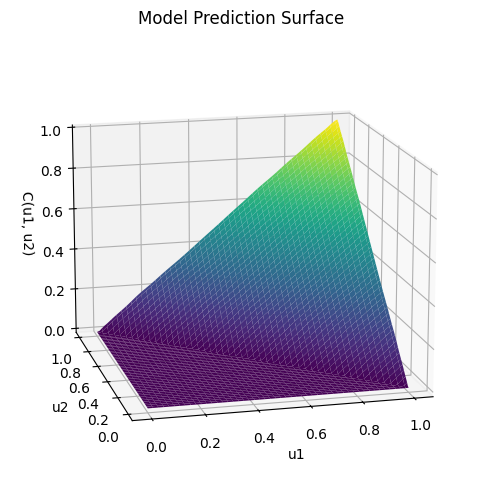

In [51]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
u1 = np.linspace(0, 1, 100)
u2 = np.linspace(0, 1, 100)
U1, U2 = np.meshgrid(u1, u2, indexing="ij")

# Convert grid to tensor
grid = np.column_stack((U1.ravel(), U2.ravel()))
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Get model predictions
model.eval()
with torch.no_grad():
    predictions = model(grid_tensor)

# Reshape predictions to match grid shape
Z = predictions.numpy().reshape(100, 100)  # Assuming scalar output

# Plot surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U1, U2, Z, cmap="viridis")

# Labels and title
ax.set_xlabel("u1")
ax.set_ylabel("u2")
ax.set_zlabel("C(u1, u2)")
ax.set_title("Model Prediction Surface")
ax.view_init(elev=15, azim=256)
plt.show()




Test if strictly 2-increasing

In [49]:
resultCol = Z[:, 1:] > Z[:, :-1]
resultRow = Z[1:, :] > Z[:-1, :]

has_false_col = np.any(resultCol == False)
has_false_row = np.any(resultRow == False)

print("Any False in resultCol?", has_false_col)
print("Any False in resultRow?", has_false_row)

Any False in resultCol? False
Any False in resultRow? False


# Sampling

Algorithm:
 - Sample one random number $u_1$
 - Calculate conditional distribution by fake derivative at $u_1$
 - Sample another random number $z_1$ 
 - Solve $C(u_2 | u_1) = z_1$ for $u_2$ so that $u_2 = C^{-1}(z_1 | u_1) $ numerically. Now two random numbers $u_1,u_2$ from the copula are sampled. 
 

In [35]:
# def copula(model, u, v):
#     return model(torch.tensor([u, v], dtype=torch.float32)).item()

# def conditional_cdf(copula, u, v, epsilon=1e-5):
#     return (copula(u, v + epsilon) - copula(u, v)) / epsilon

#CopulaClass
class Copula:
    def __init__(self, model):
        self.model = model

    def copula(self, u, v):
        return self.model(torch.tensor([u, v], dtype=torch.float32)).item()

    def conditional_cdf(self, u, v, epsilon=1e-5):
        return (self.copula(u + epsilon, v) - self.copula(u, v)) / epsilon

    def conditional_copula_function(self, fixed_variable, fixed_as="u"):
        """
        Returns a function representing the conditional copula.

        Args:
            fixed_variable (float): The value of the fixed variable.
            fixed_as (str): Either "u" (fix u and return a function of v) or "v" (fix v and return a function of u).

        Returns:
            function: A function of the remaining variable.
        """
        if fixed_as == "u":
            return lambda v: self.conditional_cdf(fixed_variable, v)
        # elif fixed_as == "v":
        #     return lambda u: self.copula(u, fixed_variable)
        else:
            raise ValueError('fixed_as must be either "u" or "v"')



## random samples from the uniform distribution
u = np.random.uniform(0, 1,(1,2))
samples = np.zeros(u.shape)
samples[:,0] = u[:,0]

copula = Copula(model)
conditional_copula = copula.conditional_copula_function(fixed_variable=u[0,0], fixed_as="u")

## Solve conditional copula for u2 given u1 using bisect method

plotdomain = np.linspace(0,1,100)
sl = np.ones(plotdomain.shape)*0.5
#copula.copula(sl, plotdomain)
plt.plot(plotdomain, copula.copula(sl, plotdomain))

## Calculate conditional copula

## Solve conditional copula for u2 given u1



RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x100 and 2x10)

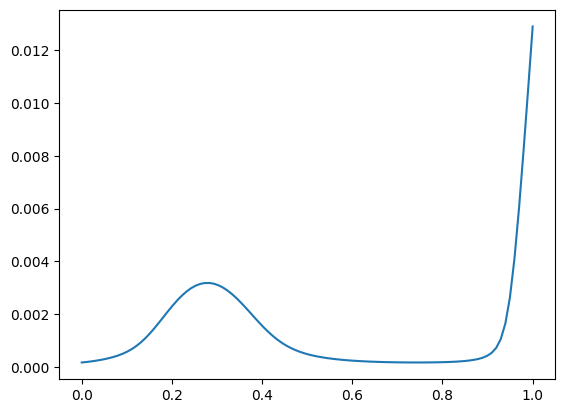

In [40]:
def evaluate_model(model, fixed_value=0.75, num_points=100, varying_index=0):
    """
    Evaluates the model by varying one variable from 0 to 1 while keeping the other fixed.
    :param model: Trained CopulaModel
    :param fixed_value: Fixed value for the non-varying variable
    :param num_points: Number of evaluation points
    :param varying_index: Index of the variable that varies (0 or 1)
    :return: Evaluation results as a numpy array
    """
    
    # Generate values for the varying variable
    varying_values = np.linspace(0, 1, num_points)
    
    # Prepare input tensor
    inputs = np.full((num_points, 2), fixed_value)
    inputs[:, varying_index] = varying_values
    
    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
    
    # Evaluate model
    with torch.no_grad():
        outputs = model(inputs_tensor).numpy()
    
    return varying_values, outputs

# Evaluate model with first variable varying and second fixed at 0.75
x_values, y_outputs = evaluate_model(model, fixed_value=0.01, num_points=100, varying_index=0)
plt.plot(x_values, y_outputs)

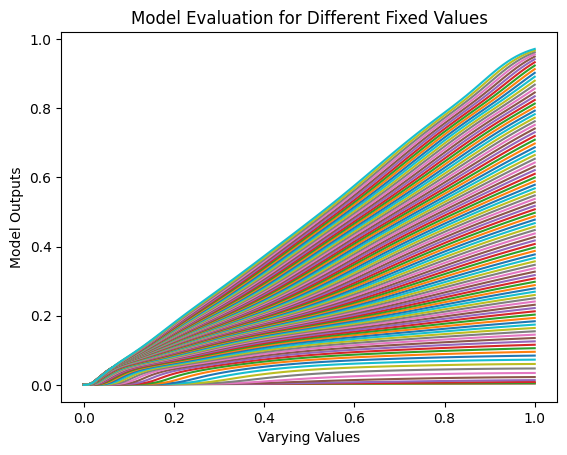

Fixed value 0.00 sequence is decreasing: True
Fixed value 0.01 sequence is decreasing: True
Fixed value 0.02 sequence is decreasing: True
Fixed value 0.03 sequence is decreasing: True
Fixed value 0.04 sequence is decreasing: True
Fixed value 0.05 sequence is decreasing: True
Fixed value 0.06 sequence is decreasing: True
Fixed value 0.07 sequence is decreasing: True
Fixed value 0.08 sequence is decreasing: True
Fixed value 0.09 sequence is decreasing: True
Fixed value 0.10 sequence is decreasing: True
Fixed value 0.11 sequence is decreasing: True
Fixed value 0.12 sequence is decreasing: True
Fixed value 0.13 sequence is decreasing: True
Fixed value 0.14 sequence is decreasing: True
Fixed value 0.15 sequence is decreasing: True
Fixed value 0.16 sequence is decreasing: True
Fixed value 0.17 sequence is decreasing: True
Fixed value 0.18 sequence is decreasing: True
Fixed value 0.19 sequence is decreasing: True
Fixed value 0.20 sequence is decreasing: True
Fixed value 0.21 sequence is decre

In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def evaluate_model(model, fixed_value=0.75, num_points=100, varying_index=0):
    """
    Evaluates the model by varying one variable from 0 to 1 while keeping the other fixed.
    :param model: Trained CopulaModel
    :param fixed_value: Fixed value for the non-varying variable
    :param num_points: Number of evaluation points
    :param varying_index: Index of the variable that varies (0 or 1)
    :return: Evaluation results as a numpy array
    """
    
    # Generate values for the varying variable
    varying_values = np.linspace(0, 1, num_points)
    
    # Prepare input tensor
    inputs = np.full((num_points, 2), fixed_value)
    inputs[:, varying_index] = varying_values
    
    inputs_tensor = torch.tensor(inputs, dtype=torch.float32)
    
    # Evaluate model
    with torch.no_grad():
        outputs = model(inputs_tensor).numpy()
    
    return varying_values, outputs

def evaluate_multiple_sequences(model, num_points=100):
    fixed_values = np.linspace(0, 1, num_points)  # 100 fixed values between 0 and 1
    decreasing_sequences = []
    
    for fixed_value in fixed_values:
        # Evaluate model with first variable varying and second fixed at current fixed_value
        x_values, y_outputs = evaluate_model(model, fixed_value=fixed_value, num_points=num_points, varying_index=0)
        
        # Check if the sequence is decreasing
        is_decreasing = np.all(np.diff(y_outputs) <= 0)
        decreasing_sequences.append(is_decreasing)
        
        # Plotting for each fixed_value (optional, depending on how many plots you want)
        plt.plot(x_values, y_outputs, label=f"Fixed={fixed_value:.2f}")
    
    plt.xlabel("Varying Values")
    plt.ylabel("Model Outputs")
    plt.title("Model Evaluation for Different Fixed Values")
    #plt.legend()
    plt.show()
    
    # Return the list of whether each sequence was decreasing
    return decreasing_sequences

# Example usage
decreasing_sequences = evaluate_multiple_sequences(model, num_points=100)

# Optionally, print which sequences are decreasing
for i, is_decreasing in enumerate(decreasing_sequences):
    print(f"Fixed value {i / 100:.2f} sequence is decreasing: {is_decreasing}")
